## Least squares Method

$$
f(x) = Ax + B \quad 
\left\{
\begin{array}{ll}
Slope & A = \frac{Cov(x, y)}{\sigma^2 x} \\
Intercept & B = \mu y - A\mu x
\end{array}
\right.
$$

In [60]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [61]:
x = np.linspace(0, 100, 50)
x_mean = sum(x)/len(x)
x_mean

50.000000000000007

In [62]:
y = x + np.random.randn(len(x))*7 + 30
y_mean = sum(y)/len(y)
y_mean

81.699984514949506

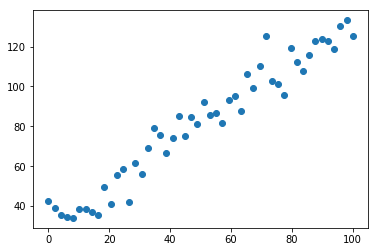

In [63]:
plt.scatter(x, y)

In [64]:
xx = []
yy = []
for i, j in zip(x, y):
   xx.append( (i - x_mean)**2 )
   yy.append( np.abs((j - y_mean)*(i - x_mean)) )

xx_mean = sum(xx)
yy_mean = sum(yy)
xx_mean, yy_mean

(43367.346938775503, 44238.67630958822)

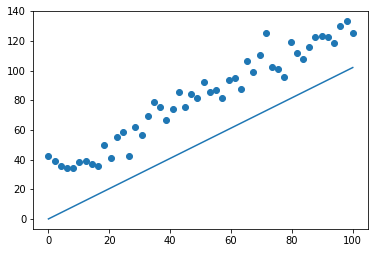

In [65]:
a = yy_mean / xx_mean
plt.scatter(x, y)
plt.plot(x, a*x)

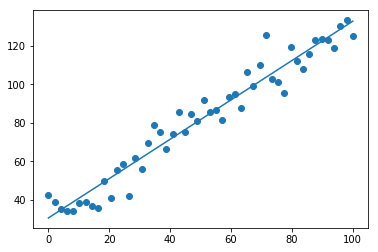

In [66]:
b = y_mean - a*x_mean
plt.scatter(x, y)
plt.plot(x, a*x + b)

In [67]:
np.random.rand(4)

array([ 0.09159293,  0.37066555,  0.06735907,  0.57240177])

## Gradient Descent

In [68]:
learning_rate = 0.01
num_steps = 500
t = y

w = np.random.rand()
b = np.zeros(1)
W = np.array([w,b])
print(W.shape)
print(W)
X = np.array([x, np.ones(len(x))]).transpose(1,0)
print(X.shape)
print(X[0:5])

(2,)
[ 0.20608183  0.        ]
(50, 2)
[[ 0.          1.        ]
 [ 2.04081633  1.        ]
 [ 4.08163265  1.        ]
 [ 6.12244898  1.        ]
 [ 8.16326531  1.        ]]


In [74]:
y = np.dot(W, X.transpose())
Loss = sum((y - t)**2)
Loss

286110.93830885814

In [ ]:
(w*x + b -t)**2

In [70]:
class hoge:
    def __init__(self, x):
        self._a = x

class fuga(hoge):
    def __init__(self, x):
        super().__init__(x)

    @property
    def a(self):
        return self._a * 100
    
    @a.setter
    def a(self, x):
        self._a //= x
    
    def __add__(self, x):
        self._a += x

aa = fuga(10)
print(aa.a)
aa.a = 2
print(aa.a)
aa + 1
aa.a

1000
500


600